In [11]:
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
from matplotlib import animation
from os.path import exists
from google.colab import files
from PIL import Image

ModuleNotFoundError: No module named 'google'

In [9]:
def gen_img(x_sht, x_t, x_sbh, y_sht , y_t, y_sbh, n_t, n_sbh, s, t, days):

  x = (x_sht, x_t, x_sbh)
  y = (y_sht, y_t, y_sbh)

  colors = ("blue", "red", "green")
  groups = ("Sehat", "Terinfeksi", "Sembuh")
  markers = ("o","o","x")
  sizes = (50,100,100)
  
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(1, 1, 1)
  plt.grid

  for x, y, color, group, markers, sizes in zip(x, y, colors, groups, markers, sizes):
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors=color, s=sizes, label=group,
               marker=markers )

  if days == 1:
    plt.title('Hari ke-'+str(days)+'     Terinfeksi = '+str(n_t)+' orang  (+'+str(n_t)+' orang)     Sembuh = 0 orang  (+0 orang)')
  elif days > 1:
    plt.title('Hari ke-'+str(days)+'     Terinfeksi = '+str(n_t)+' orang  (+'+str(t)+' orang)'+
              '     Sembuh = '+str(n_sbh)+' orang  (+'+str(s)+' orang)')

  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
  plt.show()

  if exists('image/hari.png') and (days != 1):
      fig.savefig('image/hari{}.png'.format(int(days)))
      files.download('image/hari{}.png'.format(int(days)))
      
  else:
      fig.savefig('image/hari.png')
      files.download('image/hari.png')

In [7]:
def plot_rdw(n_terinfeksi):
  # Hari Berikutnya
  i=0
  while n_terinfeksi > 0:
      terinfeksi = 0 
      sembuh = 0
      x_pos.append([])
      y_pos.append([])
      
      for j in range(n_individu):

          if (status_kesehatan[j] == 1):
              if (waktu_infeksi[j] <= t_sembuh):
                waktu_infeksi[j] +=1
              elif (waktu_infeksi[j] > t_sembuh):
                sembuh += 1
                imun[j] = 1
                status_kesehatan[j] = 0
                n_terinfeksi -= 1

                x_sembuh.append(x_pos[i][j])
                y_sembuh.append(y_pos[i][j])
                i_sembuh.append(j)

                temp = i_terinfeksi.index(j)

                # Delete Arr
                del i_terinfeksi[temp]
                del x_terinfeksi[temp]
                del y_terinfeksi[temp]

          # Posisi Sebelum
          curr_xpos = x_pos[i][j]
          curr_ypos = y_pos[i][j]

          # Update Posisi
          rand = np.random.rand(1,1)
          move = np.random.rand(1,1)
          
          # Probabilitas Individu Bergerak
          if(move > p): 
            x_pos[i+1].append(curr_xpos)
            y_pos[i+1].append(curr_ypos)
          else: 
            # Gerak Ke Kanan
            if rand <= 0.20:
                if x_max <= curr_xpos:
                    x_pos[i+1].append(curr_xpos-x_range)
                    y_pos[i+1].append(curr_ypos)
                else:
                    x_pos[i+1].append(curr_xpos+1)
                    y_pos[i+1].append(curr_ypos)
            # Gerak Ke Bawah       
            elif rand <= 0.40:
                if y_min >= curr_ypos:
                    y_pos[i+1].append(curr_ypos+y_range)
                    x_pos[i+1].append(curr_xpos)
                else:
                    y_pos[i+1].append(curr_ypos-1)
                    x_pos[i+1].append(curr_xpos)
            # Gerak Ke Kiri
            elif rand <= 0.60:
                if x_min >= curr_xpos:
                    x_pos[i+1].append(curr_xpos+x_range)
                    y_pos[i+1].append(curr_ypos)
                else:
                    x_pos[i+1].append(curr_xpos-1)
                    y_pos[i+1].append(curr_ypos)
            # Gerak Ke Atas
            else:
                if y_max <= curr_ypos:
                    y_pos[i+1].append(curr_ypos-y_range)
                    x_pos[i+1].append(curr_xpos)
                else:
                    y_pos[i+1].append(curr_ypos+1)
                    x_pos[i+1].append(curr_xpos)

          # Posisi Sembuh
          for k in i_sembuh: 
            if (k == j):
                temp = i_sembuh.index(k)
                x_sembuh[temp] = x_pos[i][temp]
                y_sembuh[temp] = y_pos[i][temp]
          # Posisi Sehat
          for k in i_sehat: 
            if (k == j):
                temp = i_sehat.index(k)
                x_sehat[temp] = x_pos[i][temp]
                y_sehat[temp] = y_pos[i][temp]
          # Posisi Terinfeksi
          for k in i_terinfeksi: 
            if (k == j):
                temp = i_terinfeksi.index(k)
                x_terinfeksi[temp] = x_pos[i][temp]
                y_terinfeksi[temp] = y_pos[i][temp]
            # Update Terinfeksi 
            if ((x_pos[i][k] == x_pos[i][j]) and (y_pos[i][k] == y_pos[i][j]) 
            and (j != k) and (i_terinfeksi[-1] < j)):
                x_terinfeksi.append(x_pos[i][j])
                y_terinfeksi.append(y_pos[i][j])
                i_terinfeksi.append(j)
                temp = i_sehat.index(j)
                # Delete Arr
                del i_sehat[temp]
                del x_sehat[temp]
                del y_sehat[temp]
                status_kesehatan[j] = 1
                n_terinfeksi+=1
                terinfeksi +=1
          
      i+=1

      hari = i
      gen_img(x_sehat, x_terinfeksi, x_sembuh, y_sehat, y_terinfeksi, y_sembuh, 
            n_terinfeksi, len(i_sembuh), sembuh, terinfeksi, i+1)
        
  return hari

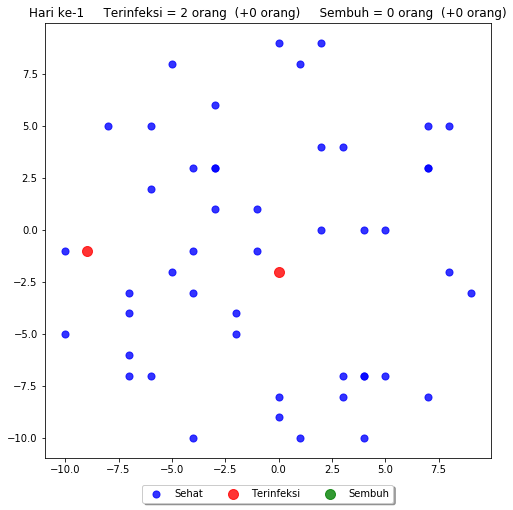

FileNotFoundError: [Errno 2] No such file or directory: 'image/hari.png'

In [8]:
# Main Program
# Jumlah Individu
n_individu = 200  

# Ratio Terinfeksi 5%
r_terinfeksi = 0.05   

# Probabilitas Individu Bergerak 80%   
p = 0.8

# Waktu Pemulihan 10 hari
t_sembuh = 10        

# Jumlah Orang Terinfeksi
n_terinfeksi = int(n_individu * r_terinfeksi)

# Jumlah Orang Sehat
n_sehat = n_individu - n_terinfeksi

#
imun = [0 for i in range(n_individu)]
waktu_infeksi = [0 for i in range(n_individu)]

# Inisialisasi Orang Terinfeksi dan Sehat
status_kesehatan = []
for i in range(n_terinfeksi):
  status_kesehatan.append(1)
for i in range(n_sehat):
  status_kesehatan.append(0)



# Generate Random Position
x_pos = [[np.random.randint(-10,10) for i in range(n_individu)]]
y_pos = [[np.random.randint(-10,10) for i in range(n_individu)]]

# Ukuran Canvas Simulasi
x_max = 10
x_min = -10
y_min = -10
y_max = 10
x_range = x_max - x_min
y_range = y_max - y_min


# Individu Terinfeksi
x_terinfeksi = [] # Sumbu x 
y_terinfeksi = [] # Sumbu y 
i_terinfeksi = [] # Simpan Individu Terinfeksi

# Individu Sehat
x_sehat = [] # Sumbu x
y_sehat = [] # Sumbu y
i_sehat = [] # Simpan Individu Sehat


# Individu Sembuh
x_sembuh = [] # Sumbu x
y_sembuh = [] # Sumbu y
i_sembuh = [] # Simpan Individu Sembuh

#inisialisasi posisi
i=0
while i < n_individu:
  if (status_kesehatan[i] == 1): # Terinfeksi
    x_terinfeksi.append(x_pos[0][i])
    y_terinfeksi.append(y_pos[0][i])
    i_terinfeksi.append(i)
  if (status_kesehatan[i] == 0): # Sehat
    x_sehat.append(x_pos[0][i])
    y_sehat.append(y_pos[0][i])
    i_sehat.append(i)
  i+=1

In [ ]:
# Hari Pertama
gen_img(x_sehat, x_terinfeksi, x_sembuh, y_sehat, y_terinfeksi, y_sembuh, n_terinfeksi, 0, 0, 0, 1)

hari = plot_rdw(n_terinfeksi)

In [ ]:
# Output Result
print('Waktu Pulih Pada'+' Hari Ke-'+str(hari+1))

# Create Frames
frames = []
imgs = gb.glob("image/*.png")
imgs.sort()

for iterasi in imgs:
    new_frame = Image.open(iterasi)
    frames.append(new_frame)
 
# Save To GIF
frames[0].save('random_walk.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=1000, loop=0)